In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

In [52]:
dfClasses = pd.read_csv('elliptic_txs_classes.csv')
dfEdgelist= pd.read_csv('elliptic_txs_edgelist.csv')
dfFeatures= pd.read_csv('elliptic_txs_features.csv')

In [9]:
dfEdgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [10]:
dfFeatures.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [11]:
dfClasses.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [12]:
dfClasses.groupby("class").nunique()

,txId
class,
1,4545
2,42019
unknown,157205


In [54]:
dfEdgelist

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


In [56]:
dfFeatures

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203763,173077460,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203764,158577750,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203765,158375402,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203766,158654197,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


In [13]:
dfClasses

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
...,...,...
203764,173077460,unknown
203765,158577750,unknown
203766,158375402,1
203767,158654197,unknown


In [14]:
dfClasses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [15]:
dfFeatures.describe()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
count,2.037680e+05,203768.000000,2.037680e+05,2.037680e+05,203768.000000,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,...,203768.000000,203768.000000,203768.000000,203768.000000,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05
mean,1.711307e+08,23.844073,8.414927e-07,9.062637e-07,0.000006,5.985709e-07,2.153162e-07,5.545621e-07,3.022251e-07,7.954968e-07,...,0.000003,0.000003,-0.000007,-0.000007,-8.970692e-08,4.293616e-07,6.436502e-07,4.786011e-07,5.919153e-07,5.878865e-07
std,1.104656e+08,15.172123,1.000005e+00,1.000005e+00,1.000001,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000004,1.000004,1.000000,1.000000,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-0.577099,-0.626229,-0.979074,-0.978556,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433451e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-0.569626,-0.594691,-0.979074,-0.978556,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624374e+08,23.000000,-1.692045e-01,-1.328975e-01,0.463609,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-0.479951,-0.455928,0.241128,0.241406,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318532e-01,-5.524241e-02,1.018602,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355929e-01,...,0.155250,0.121274,1.305483,1.398764,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520490e-01,1.199793e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953,7.914041,1.461330,1.461369,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [16]:
dfEdgelist.describe()

,txId1,txId2
count,2.343550e+05,2.343550e+05
mean,1.612218e+08,1.686881e+08
std,1.134457e+08,1.110120e+08
min,1.076000e+03,1.076000e+03
25%,6.933967e+07,7.342958e+07
50%,1.555782e+08,1.575814e+08
75%,2.433861e+08,2.454072e+08
max,4.032446e+08,4.032446e+08


In [17]:
dfClasses.describe()

,txId
count,2.037690e+05
mean,1.711310e+08
std,1.104655e+08
min,1.076000e+03
25%,8.433452e+07
50%,1.624375e+08
75%,2.454798e+08
max,4.032446e+08


In [18]:
dfFeatures.columns = ['id', 'time'] + [f'data_{i}' for i in range(93)] + [f'combined_data_{i}' for i in range(72)]
dfFeatures.head()

,id,time,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,...,combined_data_62,combined_data_63,combined_data_64,combined_data_65,combined_data_66,combined_data_67,combined_data_68,combined_data_69,combined_data_70,combined_data_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


## Exploratory Data Analysis (EDA) 

<BarContainer object of 3 artists>

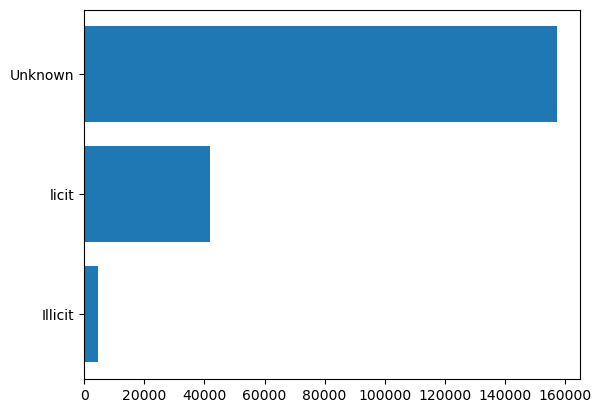

In [20]:
group_class = dfClasses.groupby('class').count()
plt.barh(['Illicit', 'licit', 'Unknown'], group_class['txId'].values)

In [21]:
group_class['txId']

class
1            4545
2           42019
unknown    157205
Name: txId, dtype: int64

Text(0.5, 1.0, 'Number of transactions by Time step')

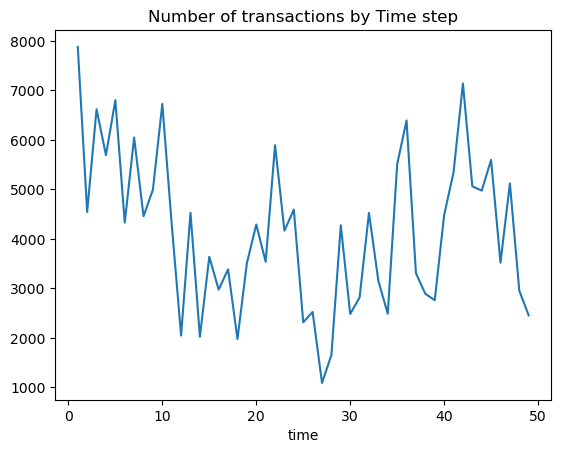

In [22]:
group_feature = dfFeatures.groupby('time').count()
group_feature['id'].plot()
plt.title('Number of transactions by Time step')

In [23]:
classes_features = pd.merge(dfClasses, dfFeatures, right_on='id', left_on='txId', how='left')
classes_features = classes_features.drop(index=classes_features.index[0])
classes_features.head()

,txId,class,id,time,data_0,data_1,data_2,data_3,data_4,data_5,...,combined_data_62,combined_data_63,combined_data_64,combined_data_65,combined_data_66,combined_data_67,combined_data_68,combined_data_69,combined_data_70,combined_data_71
1,5530458,unknown,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,unknown,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,unknown,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,230459870,unknown,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [62]:
classes_features.tail()

,txId,class,id,time,data_0,data_1,data_2,data_3,data_4,data_5,...,combined_data_62,combined_data_63,combined_data_64,combined_data_65,combined_data_66,combined_data_67,combined_data_68,combined_data_69,combined_data_70,combined_data_71
203764,173077460,0,173077460.0,49.0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
203765,158577750,0,158577750.0,49.0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.08749,-0.084674,-0.140597,-1.760926,-1.760984
203766,158375402,1,158375402.0,49.0,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
203767,158654197,0,158654197.0,49.0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.08749,-0.084674,-0.140597,1.519700,1.521399
203768,157597225,0,157597225.0,49.0,-0.012037,-0.132276,0.463609,-0.121970,-0.043875,-0.113002,...,-0.577099,-0.613614,0.241128,0.241406,-0.098889,-0.08749,-0.084674,-0.140597,1.519700,1.521399


In [24]:
classes_features['class'] = classes_features['class'].replace('unknown', 0).astype(int)

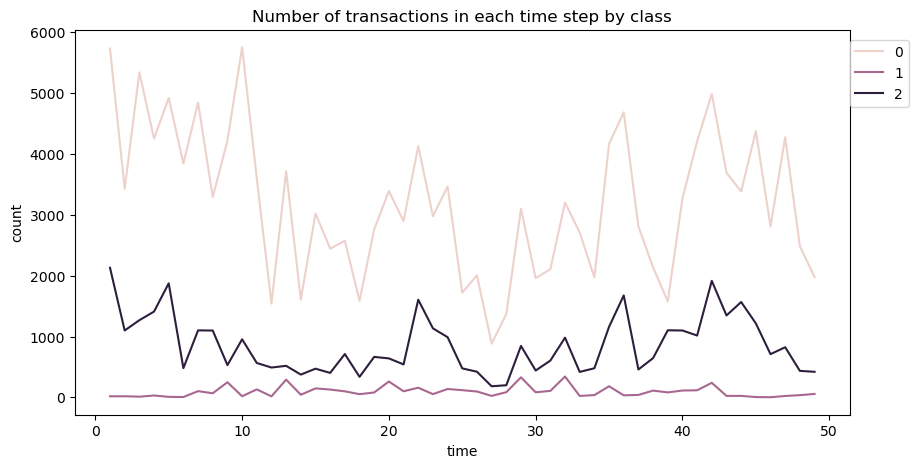

In [25]:
plt.figure(figsize=(10, 5))
group = classes_features.groupby(['time', 'class'])['id'].count().reset_index().rename(columns={'id': 'count'})
sns.lineplot(x='time', y='count', hue='class', data=group);
plt.legend(loc=(1.0, 0.8));
plt.title('Number of transactions in each time step by class');

## Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cf_clean = classes_features.dropna()

X = cf_clean.iloc[:, 4:167]
y = cf_clean['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

## Random Forest

In [30]:
accuracy = accuracy_score(y_test, predictions)
print("RandomForest: ")
print(f"Accuracy Score: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

correlation_matrix = X_train.corr()

RandomForest: 
Accuracy Score: 0.9509005251018305
Confusion Matrix:
[[31020    39   439]
 [  216   582    38]
 [ 1269     0  7151]]


In [45]:
print("Classification Report (Random Forest):")
print(classification_report(y_test, predictions, target_names=['Unknown (0)', 'Legit (2)', 'Fraud (1)']))

Classification Report (Random Forest):
              precision    recall  f1-score   support

 Unknown (0)       0.95      0.98      0.97     31498
   Legit (2)       0.94      0.70      0.80       836
   Fraud (1)       0.94      0.85      0.89      8420

    accuracy                           0.95     40754
   macro avg       0.94      0.84      0.89     40754
weighted avg       0.95      0.95      0.95     40754



In [75]:
accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.9509005251018305
Precision (macro): 0.9429933381514907
Recall (macro): 0.8434280310091818
F1-score (macro): 0.8864776038707224


In [81]:
error_rate_rf = 1 - accuracy
error_rate_rf

0.04909947489816946

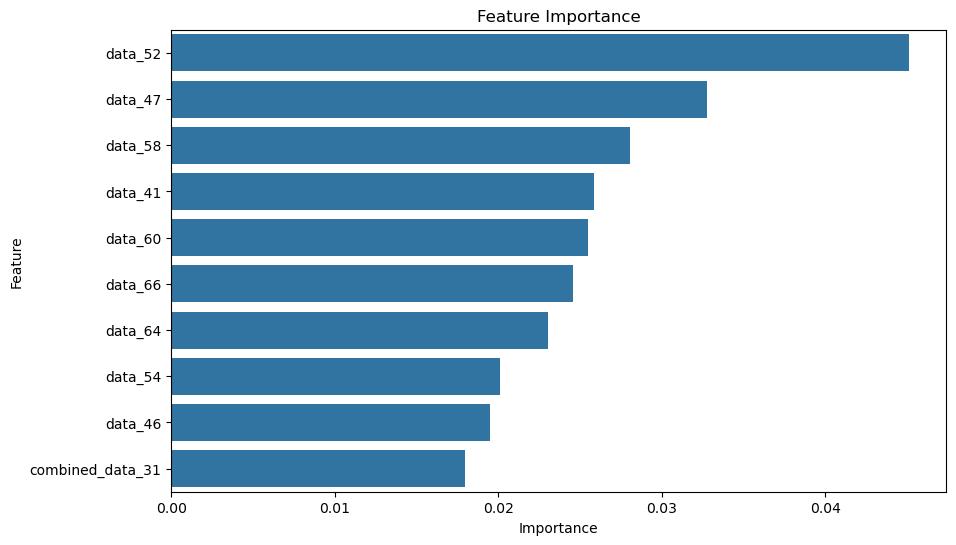

In [32]:
feature_importance_r = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance_r = feature_importance_r.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_r.head(10))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
correlation_matrix

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,combined_data_60,combined_data_61,combined_data_62,combined_data_63,combined_data_64,combined_data_65,combined_data_66,combined_data_67,combined_data_68,combined_data_69
data_0,1.000000,0.023058,-0.050414,0.006813,0.026116,0.005938,0.001036,0.976403,0.995559,0.158865,...,-0.035935,0.005647,-0.004255,-0.027330,0.013737,0.013440,-0.003028,0.069507,0.054495,0.019937
data_1,0.023058,1.000000,0.200401,0.540012,0.174222,0.548441,0.100328,0.000665,0.010580,0.024550,...,-0.005347,0.074817,0.019540,0.009910,0.027290,0.027276,0.014707,0.120134,0.036657,0.032157
data_2,-0.050414,0.200401,1.000000,0.098738,0.038582,0.100932,0.010360,-0.057577,-0.053401,0.012812,...,0.022834,0.128119,0.064118,0.073459,0.132924,0.133339,-0.007521,0.049494,0.057218,0.044749
data_3,0.006813,0.540012,0.098738,1.000000,0.009094,0.957875,0.303664,-0.019677,-0.010235,0.017493,...,0.011442,0.010917,-0.002882,0.001993,0.027225,0.027593,0.017924,0.023159,0.023281,0.031973
data_4,0.026116,0.174222,0.038582,0.009094,1.000000,0.008346,0.005237,0.024502,0.025625,0.008592,...,-0.013659,0.138261,0.035499,0.027736,0.009819,0.009387,-0.005549,0.346409,0.045285,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
combined_data_65,0.013440,0.027276,0.133339,0.027593,0.009387,0.025198,0.015413,0.012258,0.012895,0.002685,...,0.048638,-0.009001,-0.047480,-0.012223,0.997153,1.000000,0.007067,0.015169,0.017080,0.019575
combined_data_66,-0.003028,0.014707,-0.007521,0.017924,-0.005549,0.015973,0.011204,-0.004273,-0.003929,0.000461,...,0.027235,-0.029126,-0.033455,-0.014979,0.007047,0.007067,1.000000,0.138520,-0.003199,0.700430
combined_data_67,0.069507,0.120134,0.049494,0.023159,0.346409,0.015640,0.034011,0.017765,0.055133,0.103895,...,-0.007213,0.098195,0.024430,0.018618,0.014592,0.015169,0.138520,1.000000,0.807009,0.516312
combined_data_68,0.054495,0.036657,0.057218,0.023281,0.045285,0.016347,0.031424,0.004934,0.040382,0.096868,...,-0.009174,0.044663,0.017819,0.011183,0.016174,0.017080,-0.003199,0.807009,1.000000,0.648582


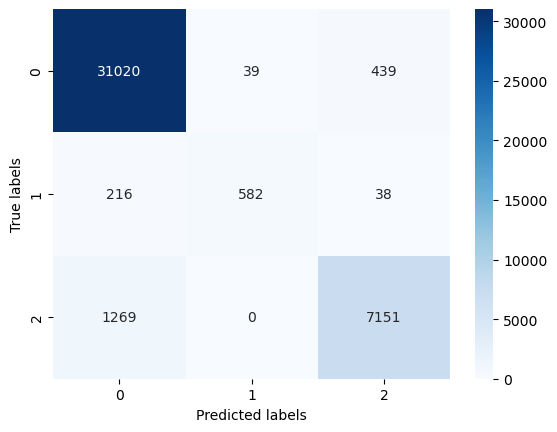

In [34]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)  
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [42]:
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("K-Nearest Neighbors:")
print(f"Accuracy Score: {knn_accuracy}")
print("Confusion Matrix:")
print(knn_conf_matrix)

K-Nearest Neighbors:
Accuracy Score: 0.9044265593561368
Confusion Matrix:
[[30519   220   759]
 [  342   471    23]
 [ 2533    18  5869]]


In [83]:
knn_accuracy = accuracy_score(y_test, knn_predictions)

precision = precision_score(y_test, knn_predictions, average='macro')
recall = recall_score(y_test, knn_predictions, average='macro')
f1 = f1_score(y_test, knn_predictions, average='macro')

print("Accuracy:", knn_accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.9044265593561368
Precision (macro): 0.8202154411500467
Recall (macro): 0.7431155565162594
F1-score (macro): 0.7763881805375562


Best k: 7 with Accuracy: 0.9044


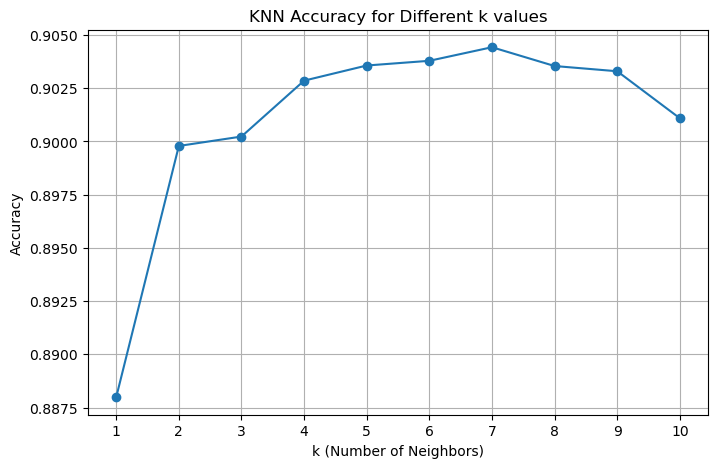

In [44]:
accuracies = []
k_values = range(1, 11)  

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)


best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k: {best_k} with Accuracy: {max(accuracies):.4f}")
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different k values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [48]:
print("Classification Report (KNN):")
print(classification_report(y_test, knn_predictions, target_names=['Unknown (0)', 'Legit (2)', 'Fraud (1)']))

Classification Report (KNN):
              precision    recall  f1-score   support

 Unknown (0)       0.91      0.97      0.94     31498
   Legit (2)       0.66      0.56      0.61       836
   Fraud (1)       0.88      0.70      0.78      8420

    accuracy                           0.90     40754
   macro avg       0.82      0.74      0.78     40754
weighted avg       0.90      0.90      0.90     40754



In [66]:
error_rate = 1 - knn_accuracy
error_rate

0.0955734406438632